# Introduction to goggles: Label bird images
In this tutorial, we demonstrate the process of using goggles to label images. We will use bird images from the Caltech-UCSD Birds-200-2011 dataset. This tutorial has two parts covering the two step in the goggles pipline:
1. Affinity matrix construction
2. label inference

## Part 1: Affinity matrix construction

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

The following are the the two types of birds  we will label: Green Jay and Whip Poor Will

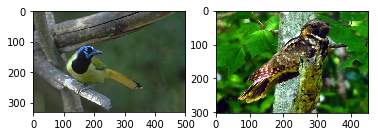

In [2]:
img0 = mpimg.imread("../../data/cub_dataset/images/Green_Jay_0003_65767.jpg")
img1 = mpimg.imread("../../data/cub_dataset/images/Whip_Poor_Will_0050_796415.jpg")
f, ax = plt.subplots(1,2)
ax[0].imshow(img0)
ax[1].imshow(img1)

In the data/cub_dataset/images folder, we have many images of the obove two birds. Load all imges into a GogglesDataset instance by:

In [3]:
from goggles import GogglesDataset
dataset = GogglesDataset.load_all_data("../../data/cub_dataset/images")

construct image affinity matrices

In [4]:
from goggles import construct_image_affinity_matrices
AFs = construct_image_affinity_matrices(dataset,cache=True)

AFs is a list of affinity matrices. Each affinity matrix looks as bellow:

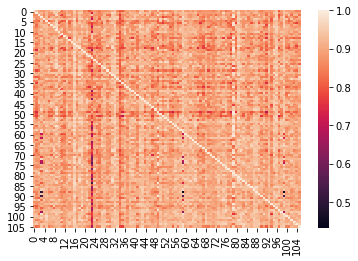

In [5]:
import seaborn as sns
sns.heatmap(AFs[0])

## Part 2: Label inference

specify the development set with indices and labels, 0 stands for Green Jay and 1 stands for Whip Poor Will

In [6]:
dev_set_indices, dev_set_labels = [1,2,3,90,91,92],[0,0,0,1,1,1]

perform inference

In [7]:
from goggles import infer_labels
prob = infer_labels(AFs,dev_set_indices,dev_set_labels)

100%|██████████| 50/50 [00:00<00:00, 251.04it/s]

The feasibility probability is: 0.9281739380708923
The probability of the dev set being sufficient is: 0.8941568394868323


prob is a probability matrix that stores the predicted proability of every image being in each type of bird. 

Note The above function also outputs two probilities. The first probability indicates how much confidence that goggles has on the labels it predicted. The second probability says whether the current dev set is sufficent enough for goggles to perform inference. 

Currently, the two proabilities are both pretty high, which means goggles expects itself to be good at this dataset and also your dev set is enough. Let's examine the quality of the predicted labels:

In [9]:
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd
y_true = pd.read_csv("../../data/cub_dataset/labels.csv")
y_true = y_true['y'].values
pred_labels = np.argmax(prob,axis=1).astype(int)
print("accuracy", accuracy_score(y_true,pred_labels))


accuracy 1.0
